<a href="https://colab.research.google.com/github/madhavamk/computational-data-science/blob/master/MiniProjects/M3_NB_MiniProject_5_Customer_Segmentation_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project Notebook: Customer segmentation using clustering

## Learning Objectives

At the end of the experiment, you will be able to :

* extract summary level insight from a given customer dataset.

* handle the missing data and identify the underlying pattern or structure of the data.

* create an unsupervised model that generates the optimum number of segments for the customer base

* identify customer segments based on the overall buying behaviour


## Dataset

The dataset chosen for this mini project is the Online Retail dataset. It is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

The dataset contains 541909 records, and each record is made up of 8 fields.

To know more about the dataset : [click here](https://archive.ics.uci.edu/ml/datasets/Online+Retail)

## Information

**Clustering** is the task of grouping together a set of objects so that the objects in the same cluster are more similar to each other than to objects in other clusters. Similarity is a measure that reflects the strength of the relationship between two data objects.

In the clustering calculation, K-Means is a very popular algorithm. In this analysis, this method is used to cluster the similar data items.

In Retail and E-Commerce (B2C), and more broadly in B2B, one of the key elements shaping the business strategy of a firm is understanding of customer behaviour. More specifically, understanding the customers based on different business metrics: how much they spend (revenue), how often they spend (frequency), are they new or existing customers, what are their favorite products, etc... Such understanding in turn helps direct marketing, sales, account management and product teams to support customers on a personalized level and improve the product offering.

Furthermore, segmenting customers into different categories based on similar/cyclical buying pattern over a period of 1 year helps the retail shops manage their inventory better, thereby lowering costs and raising revenues by placing the orders in sync with the buying cycles.

## Problem Statement

Perform customer segmentation for an Online Retail using an Unsupervised Clustering technique

## Grading = 10 Points

### Import Required packages

In [139]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

## Data Wrangling

In [37]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/Online_Retail.zip
!unzip -qq Online_Retail.zip

replace Online_Retail_Train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


## Load the data

In [38]:
# YOUR CODE HERE
def load_data(path):
  df = pd.read_csv(path)
  return df

In [39]:
df = load_data('Online_Retail_Train.csv')

In [40]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,8.50,16479.0,United Kingdom
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-05-22 12:41:00,0.42,17176.0,United Kingdom
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,0.42,16712.0,United Kingdom
3,C571196,23350,ROLL WRAP VINTAGE SPOT,-12,2011-10-14 12:02:00,1.25,NaN,United Kingdom
4,546649,84509a,SET OF 4 ENGLISH ROSE PLACEMATS,1,2011-03-15 14:17:00,7.46,NaN,United Kingdom


In [41]:
df.value_counts()

InvoiceNo  StockCode  Description                       Quantity  InvoiceDate          UnitPrice  CustomerID  Country       
555524     22698      PINK REGENCY TEACUP AND SAUCER     1        2011-06-05 11:37:00  2.95       16923.0     United Kingdom    19
           22697      GREEN REGENCY TEACUP AND SAUCER    1        2011-06-05 11:37:00  2.95       16923.0     United Kingdom     9
538514     21756      BATH BUILDING BLOCK WORD           1        2010-12-12 14:27:00  5.95       15044.0     United Kingdom     6
541266     21754      HOME BUILDING BLOCK WORD           1        2011-01-16 16:25:00  5.95       15673.0     United Kingdom     6
           21755      LOVE BUILDING BLOCK WORD           1        2011-01-16 16:25:00  5.95       15673.0     United Kingdom     6
                                                                                                                                ..
553913     22151      PLACE SETTING WHITE HEART          216      2011-05-19 19:47:00  0.42       18109.0     United Kingdom     1
           21781      MA CAMPAGNE CUTLERY BOX            1        2011-05-19 19:47:00  14.95      18109.0     United Kingdom     1
           21756      BATH BUILDING BLOCK WORD           2        2011-05-19 19:47:00  5.95       18109.0     United Kingdom     1
           21755      LOVE BUILDING BLOCK WORD           2        2011-05-19 19:47:00  5.95       18109.0     United Kingdom     1
C581569    84978      HANGING HEART JAR T-LIGHT HOLDER  -1        2011-12-09 11:58:00  1.25       17315.0     United Kingdom     1
Name: count, Length: 381837, dtype: int64

## Data Pre-processing (2 points)

Explore the dataset by performing the following operations:

* There is a lot of redundant data. Identify such data and take appropriate action.

  **Hint:** refer to this [link](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)

* Most Invoices appear as normal transactions with positive quantity and prices, but there are some prefixed with "C" or "A" which denote different transaction types. Invoice starting with C represents cancelled order and A represents the Adjusted. Identify such data and take appropriate action.

  **Hint:** Check the negative values in Quantity column for all cancelled orders

* Handle the null values by dropping or filling with appropriate mean


* Some of the transactions based on the `StockCode` variable are not actually products, but representing the costs or fees regarding to the post or bank or other tansactions. Find such data and handle it accordingly.

  Hint:
    - The transaction with `'POST' 'PADS' 'M' 'DOT' 'C2' 'BANK CHARGES'` as their `StockCodes` are considered as irrelevant transactions.

* Identify the outliers in the UntiPrice and Quantity and handle them accordingly.

  **Hint:** [link](https://thecleverprogrammer.com/2023/07/26/detect-and-remove-outliers-using-python/)

* Create a DayOfWeek column using `InvoiceDate`, Hint: pd.to_datetime()

**Note:** Perform all the above operations using a function to reuse and apply the same for test data.

In [42]:
# YOUR CODE HERE
# Handle the outlier, cap
def handle_outliers_cap(df, column, lower_percentile=0.25, upper_percentile=0.75):
    lower_limit = df[column].quantile(lower_percentile)
    upper_limit = df[column].quantile(upper_percentile)

    df[column] = np.clip(df[column], lower_limit, upper_limit)
    return df

def data_preprocessing(df):
    df = df.drop_duplicates()
    # Ignore Cancelled/Adjusted Invoices
    df = df[~df['InvoiceNo'].str.contains('C|A')]
    # Handle Null Values by dropping
    df = df.dropna()
    # Remove irrelevant transactions
    irrelevant_codes = ['POST', 'PADS', 'M', 'DOT', 'C2', 'BANK CHARGES']
    df = df[~df['StockCode'].isin(irrelevant_codes)]
    df = handle_outliers_cap(df, 'UnitPrice')
    df = handle_outliers_cap(df, 'Quantity')
    df['DayOfWeek'] = pd.to_datetime(df['InvoiceDate']).dt.day_name()
    return df


In [43]:
df = data_preprocessing(df)

## Understanding new insights from the data (1 point)

1.  Are there any free items in the data? How many are there?

2.  Find the number of transactions per country and visualize using an appropriate plot

3.  What is the ratio of customers who are repeat purchasers vs single-time purchasers? Visualize using an appropriate plot.

4. Plot heatmap showing unit price per month and day of the week

  **Hint:** Month name as index on Y-axis, Day of the week on X-axis

5. Find the top 10 customers who bought the most no.of items. Also find the top 10 Items bought by most no.of customers.

In [44]:
# YOUR CODE HERE
# Check for free items
def check_free_items(df):
    free_items = df[df['UnitPrice'] == 0]
    return free_items

# Check for Txs per country and plot it
def check_tx_per_country(df):
    txs_per_country = df['Country'].value_counts()
    plt.figure(figsize=(10, 10))
    sns.barplot(x=txs_per_country.index, y=txs_per_country.values)
    plt.xticks(rotation=90)
    plt.xlabel('Country')
    plt.ylabel('Number of Transactions')
    plt.title('Number of Transactions per Country')
    plt.show()
    return txs_per_country

# Ratio of New/Repeat Purchasers
def customer_purchasers_ration(df):
    customer_counts = df['CustomerID'].value_counts()
    repeat_purchasers = len(customer_counts[customer_counts > 1])
    single_time_purchasers = len(customer_counts[customer_counts == 1])
    print(f"Repeat Purchasers: {repeat_purchasers}")
    print(f"Single-Time Purchasers: {single_time_purchasers}")
    plt.figure(figsize=(10, 10))
    plt.pie([repeat_purchasers, single_time_purchasers],\
            labels=['Repeat Purchasers', 'Single-Time Purchasers'],\
            autopct='%1.1f%%')
    plt.title('Ratio of Customers')
    plt.show()
    return customer_counts

# Heatmap showing unit price per month and day of the week
def heatmap_data_per_month_day(df):
    df_month_day = df.copy()
    df_month_day['Month'] = pd.to_datetime(df_month_day['InvoiceDate']).dt.month_name()
    df_month_day['Month'] = pd.Categorical(df_month_day['Month'],\
                                           categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],\
                                           ordered=True)
    df_month_day['DayOfWeek'] = pd.Categorical(df_month_day['DayOfWeek'],\
                                               categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],\
                                               ordered=True)
    heatmap_data = df_month_day.pivot_table(values='UnitPrice', index='Month',\
                                            columns='DayOfWeek', aggfunc='mean')
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f")
    plt.title('Average Unit Price per Month and Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Month')
    plt.show()

# Find top 10 Customers
def top_ten_customers(df):
    top_10_customers = df.groupby('CustomerID')['Quantity'].sum().nlargest(10)
    print("\n\n*****Top 10 Customers******\n")
    print(top_10_customers)
    return top_10_customers

# Find top 10 items
def top_ten_items(df):
    top_10_items = df.groupby('Description')['Quantity'].sum().nlargest(10)
    print("\n\n*****Top 10 Items*****\n")
    print(top_10_items)
    return top_10_items

def new_insights(df):
    # Identify free item in the data and count
    free_items = check_free_items(df)
    print(f"Number of free items in the data: {len(free_items)}")
    # Num of txs per country and visualise using appropriate plot
    txs_per_country = check_tx_per_country(df)
    # Ratio of customers who are repeat purchasers/single-time
    customer_counts = customer_purchasers_ration(df)
    # Plot heatmap showing unit price per month and day of the week
    heatmap_data_per_month_day(df)
    # Find top 10 customers
    top_10_customers = top_ten_customers(df)
    # Find top 10 items
    top_10_items = top_ten_items(df)

Number of free items in the data: 0


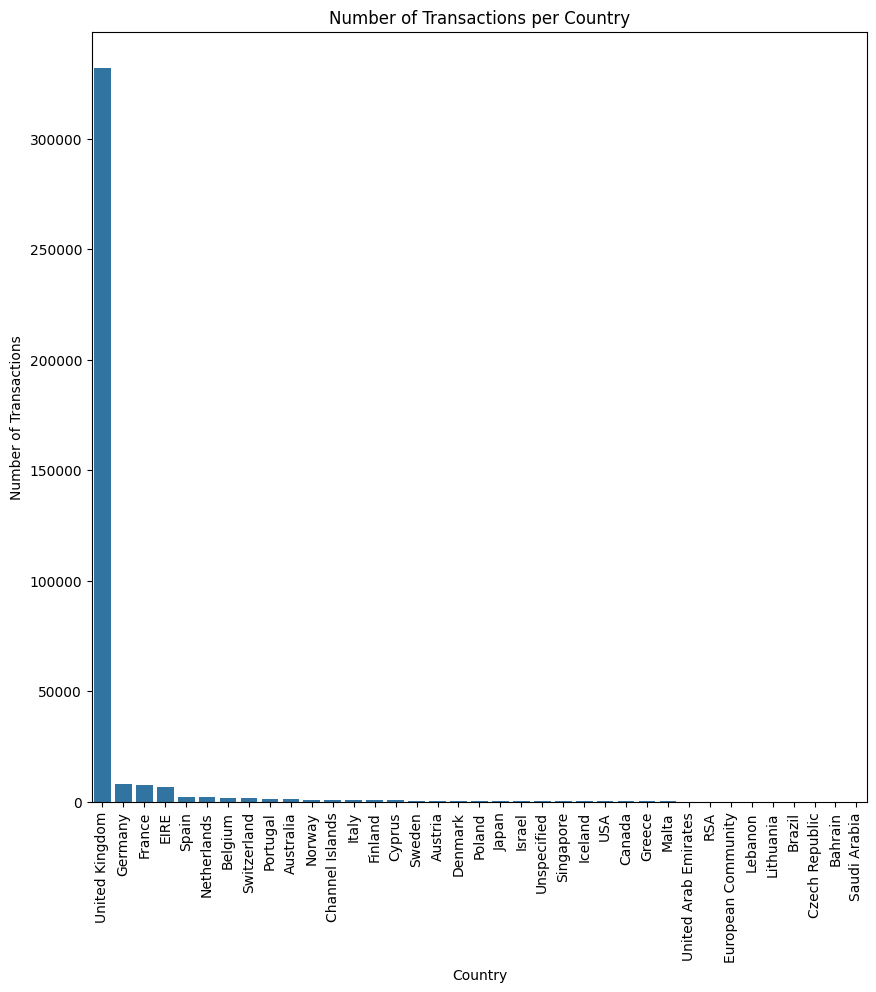

Repeat Purchasers: 4253
Single-Time Purchasers: 80


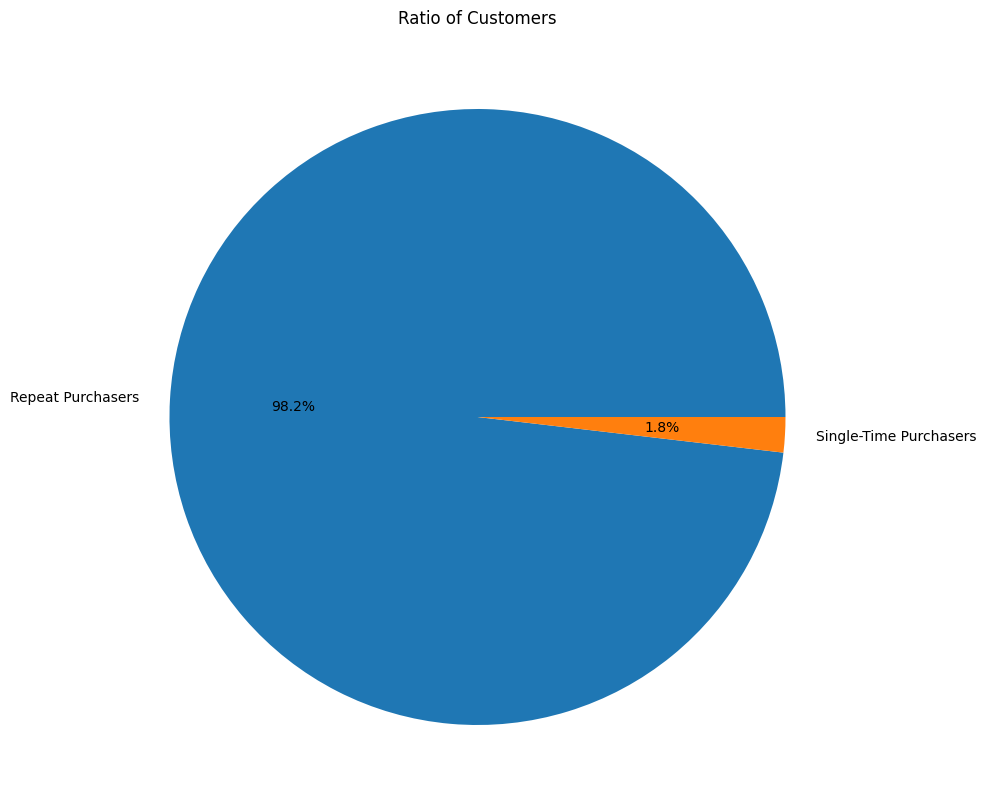

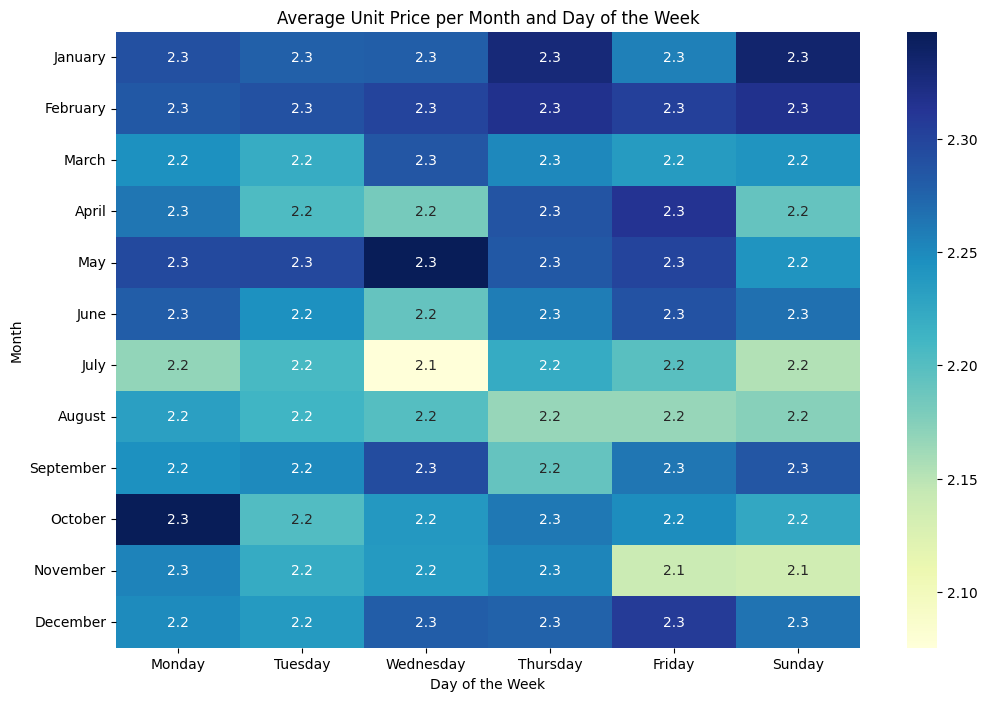



*****Top 10 Customers******

CustomerID
14911.0    44924
17841.0    21979
14646.0    21474
13089.0    17650
14298.0    17584
14096.0    16016
12748.0    15993
14156.0    11582
15311.0    11316
17511.0    10579
Name: Quantity, dtype: int64


*****Top 10 Items*****

Description
WHITE HANGING HEART T-LIGHT HOLDER    13688
JUMBO BAG RED RETROSPOT               13521
ASSORTED COLOUR BIRD ORNAMENT         12826
LUNCH BAG RED RETROSPOT                9831
PACK OF 72 RETROSPOT CAKE CASES        9039
JAM MAKING SET PRINTED                 8055
VICTORIAN GLASS HANGING T-LIGHT        7974
PARTY BUNTING                          7856
REGENCY CAKESTAND 3 TIER               7707
HEART OF WICKER SMALL                  7466
Name: Quantity, dtype: int64


In [45]:
new_insights(df)

In [46]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,3.75,16479.0,United Kingdom,Tuesday
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,12,2011-05-22 12:41:00,1.25,17176.0,United Kingdom,Sunday
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,1.25,16712.0,United Kingdom,Monday
5,579668,23575,SNACK TRAY PAISLEY PARK,8,2011-11-30 12:32:00,1.95,15152.0,United Kingdom,Wednesday
7,547684,23176,ABC TREASURE BOOK BOX,8,2011-03-24 14:46:00,2.25,12408.0,Belgium,Thursday


## Feature Engineering and Transformation (2 points)

### Create new features to uncover better insights and drop the unwanted columns

* Create a new column which represents Total amount spent by each customer

    **Hint:** Quantity * UnitPrice

* Customer IDs are seen to be repeated. Maintain unique customer IDs by grouping and summing up all possible observations per customer.

    **Hint:** [pandas.groupby.agg](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)

**Note:** Perform the above operations in function, to reuse and apply the same for test data

In [74]:
# YOUR CODE HERE
def create_new_features(df):
    df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
    df_mod = df.groupby('CustomerID').agg({
        'InvoiceNo': 'nunique',
        'StockCode': 'nunique',
        'Quantity': 'sum',
        'UnitPrice': 'mean',
        'TotalAmount': 'sum',
    }).reset_index()
    return df, df_mod

In [114]:
df, df_mod = create_new_features(df)

In [115]:
df_mod.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalAmount
0,12346.0,1,1,12,1.250000,15.00
1,12347.0,7,100,1582,2.357310,3225.82
2,12348.0,4,20,312,1.265385,394.80
3,12349.0,1,67,523,2.490000,1071.09
4,12350.0,1,16,184,1.656250,297.80


In [116]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,DayOfWeek,TotalAmount
0,579427,22636,CHILDS BREAKFAST SET CIRCUS PARADE,2,2011-11-29 13:04:00,3.75,16479.0,United Kingdom,Tuesday,7.5
1,554092,21916,SET 12 RETRO WHITE CHALK STICKS,12,2011-05-22 12:41:00,1.25,17176.0,United Kingdom,Sunday,15.0
2,577774,84692,BOX OF 24 COCKTAIL PARASOLS,6,2011-11-21 15:57:00,1.25,16712.0,United Kingdom,Monday,7.5
5,579668,23575,SNACK TRAY PAISLEY PARK,8,2011-11-30 12:32:00,1.95,15152.0,United Kingdom,Wednesday,15.6
7,547684,23176,ABC TREASURE BOOK BOX,8,2011-03-24 14:46:00,2.25,12408.0,Belgium,Thursday,18.0


### Scale the data

Apply `StandardScaler` on the features.

In [117]:
# YOUR CODE HERE for scaling
def scale_data(df):
  scaler = StandardScaler()
  df_scaled = scaler.fit_transform(df)
  df_scaled = pd.DataFrame(df_scaled)
  return df_scaled

In [118]:
df_scaled = scale_data(df_mod)
df_scaled.columns = ['CustomerID','InvoiceNo','StockCode','Quantity', 'UnitPrice', 'TotalAmount']

In [119]:
df_scaled.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalAmount
0,-1.715382,-0.424487,-0.700574,-0.443480,-2.169210,-0.439973
1,-1.714801,0.363504,0.492665,0.824053,0.086557,0.863532
2,-1.714220,-0.030492,-0.471569,-0.201277,-2.137869,-0.285785
3,-1.713640,-0.424487,0.094919,-0.030927,0.356868,-0.011229
4,-1.713059,-0.424487,-0.519781,-0.304617,-1.341614,-0.325164


## Clustering ( 5 points)

### Apply k-means algorithm to identify a specific number of clusters


* Fit the k-means model

* Extract and store the cluster centroids

Below are the parameters for k-means, which are helpful

**n_clusters** is no. of clusters specified

**k-means++** is a random initialization method for centroids to avoid random initialisation trap

**max_iter** is max no of iterations defined when k-means is running

**n_init** is no. of times k-means will run with different initial centroids

[why-is-k-means-slower-than-random-initialization-k-means](https://stats.stackexchange.com/questions/185396/why-is-k-means-slower-than-random-initialization-k-means/185422)

In [120]:
# YOUR CODE HERE to apply KMeans
def apply_kmeans(df, n_clusters=3, max_iter=50, n_init=10, random_state=42):
    kmeans = KMeans(n_clusters=n_clusters, max_iter=max_iter, n_init=n_init, random_state=random_state) # Pass parameters as keyword arguments
    kmeans.fit(df)
    return kmeans

In [121]:
kmeans = apply_kmeans(df_scaled)

In [122]:
kmeans

KMeans(max_iter=50, n_clusters=3, n_init=10, random_state=42)

#### Find the optimal number of clusters (K) by using the [Elbow method](https://pythonprogramminglanguage.com/kmeans-elbow-method/).

Use the optimal no. of clusters and store the cluster centroids

In [123]:
# YOUR CODE HERE
def find_optimal_clusters(df, max_clusters=10):
    wcss = []
    for cluster in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=cluster, max_iter=50, random_state=42)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
        # Plot the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), wcss, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    plt.title('Elbow Method')
    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

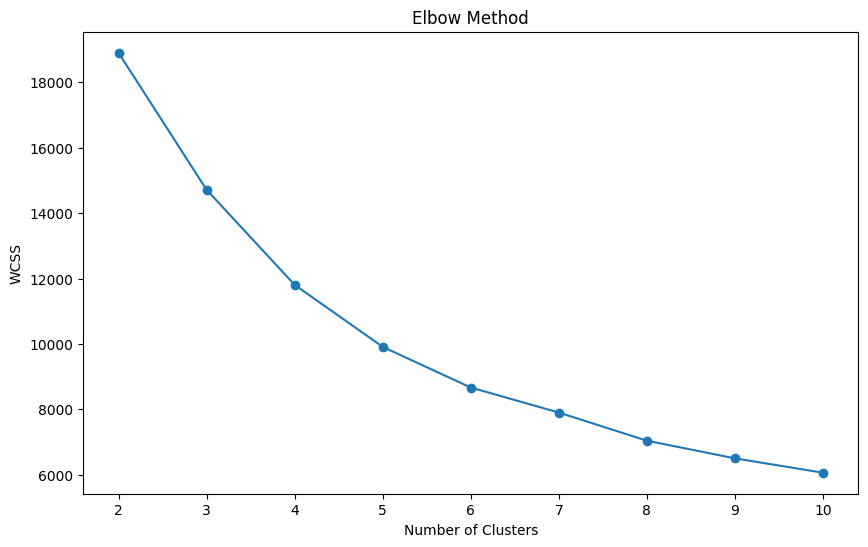

In [124]:
find_optimal_clusters(df_scaled)

In [125]:
# By above graph, elbow is at 4, so selecting 4 as num_clusters
kmeans = apply_kmeans(df_scaled, n_clusters=4)
k_centroids = kmeans.cluster_centers_
print(k_centroids)

[[-0.86484587 -0.1755347  -0.21317125 -0.16328171  0.08279138 -0.1607891 ]
 [-0.03597468  1.48539625  1.76587516  1.43823315 -0.18279358  1.42424762]
 [-0.42593235 12.59196597 11.73670381 15.56080453 -0.24374089 15.57495929]
 [ 0.86205773 -0.1757456  -0.1898128  -0.19205829 -0.04466128 -0.19183497]]


### Apply DBSCAN algorithm for clustering

- Compare the results of clusters from k-means and DBSCAN


In [126]:
# YOUR CODE HERE
def apply_dbscan(df, eps=0.5, min_samples=5):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(df)
    return dbscan

In [127]:
dbscan = apply_dbscan(df_scaled)
d_centroids = dbscan.components_
print(d_centroids)

[[-1.71538198 -0.42448734 -0.70057446 -0.44348028 -2.16920983 -0.43997303]
 [-1.71363966 -0.42448734  0.09491851 -0.03092658  0.35686812 -0.01122944]
 [-1.71305888 -0.42448734 -0.51978061 -0.3046168  -1.34161373 -0.32516398]
 ...
 [ 1.73093705 -0.42448734 -0.59209815 -0.41683787  2.19031179 -0.38697331]
 [ 1.73151782 -0.42448734 -0.62825692 -0.40795707 -0.21935703 -0.40879434]
 [ 1.7320986  -0.29315541 -0.58004523 -0.39907626  0.92356889 -0.3856336 ]]


### Analyze the clusters


- consider two features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** 2D plot

- consider three features and visualize the clusters with different colors using the predicted cluster centers.

  **Hint:** [3D plot](https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html
)

In [128]:
# Label the clusters
def label_clusters(df, kmeans):
    df['Cluster'] = kmeans.labels_
    return df

In [129]:
df_labelled = label_clusters(df_scaled,kmeans)

In [130]:
df_labelled.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalAmount,Cluster
0,-1.715382,-0.424487,-0.700574,-0.443480,-2.169210,-0.439973,0
1,-1.714801,0.363504,0.492665,0.824053,0.086557,0.863532,0
2,-1.714220,-0.030492,-0.471569,-0.201277,-2.137869,-0.285785,0
3,-1.713640,-0.424487,0.094919,-0.030927,0.356868,-0.011229,0
4,-1.713059,-0.424487,-0.519781,-0.304617,-1.341614,-0.325164,0


<ipython-input-133-ee8a425cc7ea>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='TotalAmount', data=df_labelled, palette='Set3')


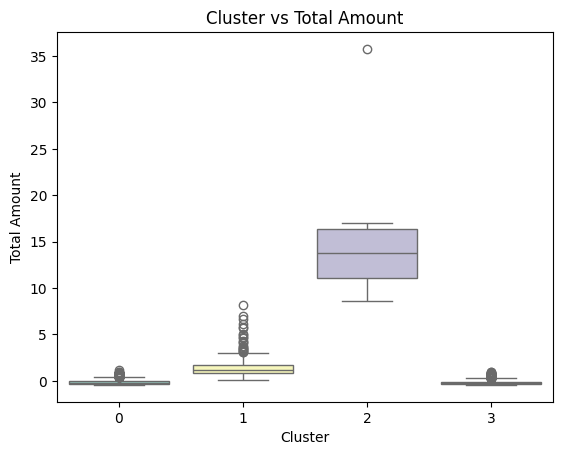

In [133]:
# YOUR CODE HERE
# Boxplot for Clusterid vs amount
sns.boxplot(x='Cluster', y='TotalAmount', data=df_labelled, palette='Set3')
plt.xlabel('Cluster')
plt.ylabel('Total Amount')
plt.title('Cluster vs Total Amount')
plt.show()

Text(0.5, 0, 'TotalAmount')

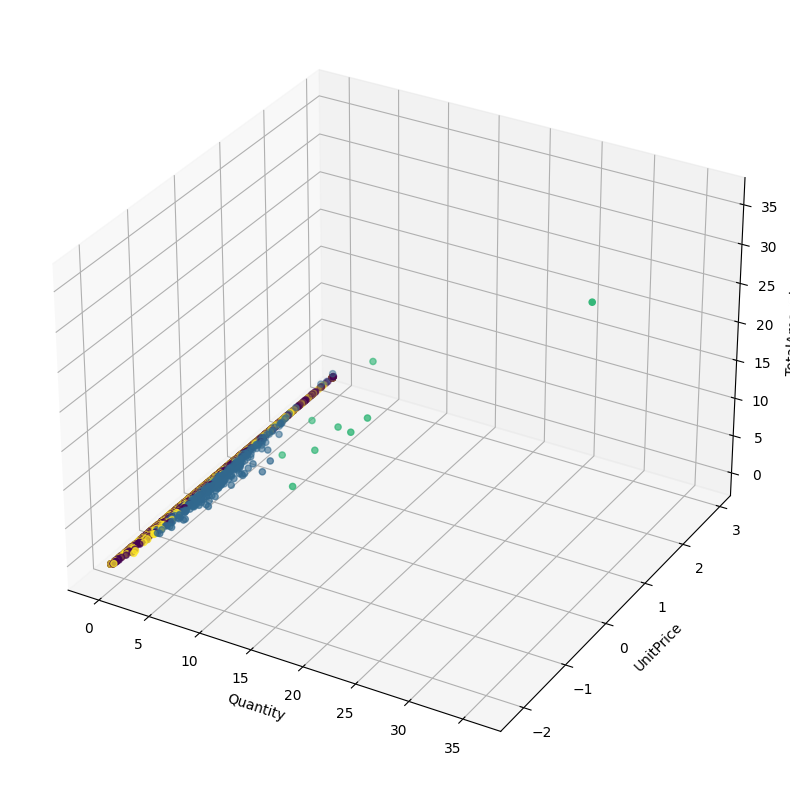

In [138]:
# Plot for 3 features
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.scatter(df_labelled['Quantity'], df_labelled['UnitPrice'], df_labelled['TotalAmount'], c=df_labelled['Cluster'], cmap='viridis')
ax.set_xlabel('Quantity')
ax.set_ylabel('UnitPrice')
ax.set_zlabel('TotalAmount')

### Train a supervised algorithm on clustered data

This will allow us to predict cluster numbers (label) for each test data instance

* Create labelled data with k-means cluster labels
  
  **Hint**: [`kmeans.labels_`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
)
* Split the data into train and validation sets
* Train a supervised algorithm on the train data
* Find the accuracy of the model using validation data

In [140]:
# YOUR CODE HERE
# df_labelled can be used directly
X_train, X_test, y_train, y_test = train_test_split(df_labelled.drop('Cluster', axis=1), df_labelled['Cluster'], test_size=0.2, random_state=42)

# Use XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9803921568627451


### Evaluation of Test Data
* Use the model to predict the labels for the Test data below
* Format the test data in the same format as the train data.
* Predict it with trained supervised ML model

In [141]:
# Test set provided as below
test = pd.read_csv("Online_Retail_Test.csv")
test.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom
1,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom
2,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom


In [143]:
# YOUR CODE HERE
test = data_preprocessing(test)
test, test_mod = create_new_features(test)
test_scaled = scale_data(test_mod)
test_scaled.columns = ['CustomerID','InvoiceNo','StockCode','Quantity', 'UnitPrice', 'TotalAmount']
test_predictions = xgb.predict(test_scaled)


In [144]:
test_predictions

array([0, 0, 0, ..., 3, 1, 3])

### Report Analysis

- Discuss the pros and cons of removing the missing values vs replacing with the mean values
- Based on the visualization of clusters, comment on the difference in buying patterns of each cluster
- What other methods could be used to determine the optimal no. of clusters?

### Report Analysis Publish

## Pros and cons of removing missing val vs replacing with mean

Pros of removing missing values
*   Data will be cleaned
*   No need of complex data handling without having to visualise data

Cons of removing instead of replacing
*   Dataset reduces
*   We may missout on some important indicators for data


## Difference in buying patterns of each cluster
From the box plot, cluster-2 is found to be buying more, other cluster seems to have lot of outliers

## Methods to determine optimal number of clusters
*   Other measures like silhoutte score can be used
*   Other algorithm itself can be used like K-medoids





